## Hyperparameter Search in Deep Learning

### Grid Search

Grid Search is a search method in which the parameters are searched from a grid of combination of range of possible values. Generally, one parameter to be searched is in uniform gap in some pre-specified gap. If there is another parameter, each value of this parameter is combined with each value of previous parameter to form a grid like structure. Hence, we call this search method a grid search.

In hyperparameter search, we can use the same technique to search for the best hyperparameters. This can be determined by using metrics on test dataset. Thus, we can find the best model by searching through the hyperparameters in a grid.

#### Example: Grid Search of two hyperparameters

Let us use grid hyperparameter search for finding the hyperparameter of a neural network. Let us consider the two hyperparameters to be:
1. Learning Rate (lr)
2. Batch Size (bs)

Now, we can define the range of hyperparameters to search in. For Learning Rate, let us use values in the range [0.001, 0.00001]. For batch size, let us use values in the range [8, 1024]. Since the range is too large, we will use some gap between the parameters to be searched.

Let us use the learning rate in this range to produce 10 learning rates to try. Also, on the batch size, let us use all powers of 2 in the range.
The grid of the parameters look like below:
<!--  
<img src="https://drive.google.com/uc?export=view&id=13mbsni2jPiJUoc7hRx-CeHICxz3Lgxzl" alt="Fig: Grid Search on" width="600"/> -->

<img src =" https://i.postimg.cc/ZKdqWpV2/image.png" alt="Fig: Grid Search on" width="600"/>

We then train our models with these values as hyperparameters and the one that performs best on test metrics is chosen as best model (and best hyperparameters). Similarly, grid search can be done for multiple hyperparameters.

The problem with grid search is that it takes a lot of time to try all the combinations. The larger the number of hyperparameters, the larger the time taken. The number of combinations increases drastically when one parameter is increased. Trying all the combinations then becomes infeasible for a large number of hyperparameters. Hence, this method is not generally used for hyperparameter tuning in deep neural networks with lots of hyperparameters.



### Random Search

Random Search is another search method where the parameters are sampled randomly from prespecified distribution such as uniform or gaussian distribution.

In Grid search, we search parameters in a grid like structure specified by combination of possible values of parameters. In Random Search, we randomly sample parameters from their possible distribution and use all randomly sampled parameters. We use random search to randomly sample hyperparameters in Deep Learning models. Using random search gives us various hyperparameters to use in our models, but it does not try to cover all possible combinations of hyperparameters. Hence, we get variation in hyperparameters and can try to find the best model with those hyperparameters.

Let us use Random Search to find two hyperparameters, learning rate and batch size. Let us consider the learning rate to be in range [0.001, 0.00001]and batch size in range [8, 1024], distributed uniformly.

Sampling uniformly in the given ranges for 20 times, we get parameters as follows:

<!-- <img src="https://drive.google.com/uc?export=view&id=1SujDvkMCweGIv0ZN8kGh_GOFKKz0ykHN" alt="Fig: Grid Search on" width="500"/> -->
<img src ="https://i.postimg.cc/y8KSBLsv/image.png"  alt="Fig: Grid Search on" width="500"/>

If there are a large number of hyperparameters, we can benefit from randomly searching for hyperparameters. We can try various combinations of hyperparameters, and hence get various models with those hyperparameters. Although this method is beneficial to find best among the various randomly sampled hyperparameters, we cannot find the best possible hyperparameter. To find the best hyperparameter, we need to sample the hyperparameters a large number of times. This is infeasible when the model takes a long time to train and when there are large number of hyperparameters. Still, it is better than grid search in deep learning.







### Genetic Grid Search

Genetic Grid Search is a parameter search method in which the parameters are selected using genetic algorithm. Let us recall the genetic algorithm first before using it for hyperparameter search.

Genetic algorithms use an iterative approach of creating new populations and selecting the population. The steps of genetic algorithm are listed below:

1. Create Initial Population

2. Find the fitness of the Individuals using Fitness Function

3. Select the fit Individuals (with some randomness)

4. Crossover the genes (data/parameter) of some Individuals to produce the Population of New Generation.

5. Mutate the genes of some Individuals

6. Repeat step 2 to 5 until some condition is satisfied.

<!-- REFERENCE: https://towardsdatascience.com/introduction-to-genetic-algorithms-including-example-code-e396e98d8bf3 -->

Same algorithm can be used to search for the hyperparameters in Machine Learning. The Individuals are one set of hyperparameters. The fitness function is the test set metrics, which is used to determine the best model. The crossover is combining the set of hyperparameters to create another set of hyperparameters(Individuals). Mutation is the random changes made to the hyperparameters.

The steps of genetic grid search are listed below:

1. Randomly sample some sets of hyperparameters (Individuals)

2. Train model with these hyperparameters, Find the test metrics for each Individuals

3. Select some best performing Individuals (say 10).

4. Create some set with mixture of these hyperparameters.

5. Randomly change some of the hyperparameters of some sets.

6. Repeat step 2 to 5 until a satisfying model is achieved, or some condition is satisfied.





#Example of Grid Search and Random Search in ANN

In [1]:
### IMPORT REQUIRED LIBRARIES ###
# %tensorflow_version 2.x
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
import tensorflow.keras.activations as activations
import matplotlib.pyplot as plt
from sklearn import model_selection as ms

2025-06-27 16:16:07.533733: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751020267.557814   25143 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751020267.564737   25143 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1751020267.582279   25143 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1751020267.582300   25143 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1751020267.582302   25143 computation_placer.cc:177] computation placer alr

Create a Classifier model for MNIST dataset. MNIST dataset consists of images of size 28*28, which is 784 dimensions. The outputs are classes of each image (0...9), which is 10 dimensional one hot vectors. Now, we will create a model with ReLU activation function and 3 layers with `256, 158, 10` dimensional outputs. This is shown in the code below.

In [2]:
class Classifier(keras.Model):
    def __init__(self):
        super(Classifier, self).__init__()

        self.dense0 = layers.Dense(256, activation='relu')
        self.dense1 = layers.Dense(128, activation='relu')
        self.dense2 = layers.Dense(10, activation='softmax')

    def call(self, x):
        h = self.dense0(x)
        h = self.dense1(h)
        h = self.dense2(h)
        return h

model = Classifier()
model.build(input_shape = (None,784))
model.summary()

/home/jagannath/fuseAi/ai_ml_venv/lib/python3.12/site-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'classifier', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Model: "classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

We need to load the dataset for training the model with various hyperparameters.

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1,28*28)/255
x_test = x_test.reshape(-1,28*28)/255

In [4]:
x_train,x_val,y_train,y_val=ms.train_test_split(x_train,y_train, test_size=0.15)

print("Train",x_train.shape,y_train.shape)
print("Test",x_test.shape,y_test.shape)
print("Validation",x_val.shape,y_val.shape)

Train (51000, 784) (51000,)
Test (10000, 784) (10000,)
Validation (9000, 784) (9000,)


### Define function to train on given hyperparameters.

We will define a function which takes input: `batch_size, learning_rate` and returns the trained model with its performance on test dataset.

In [5]:
def train_model(batch_size, learning_rate, epochs=2):
    print(f'Training model with batch_size {batch_size} and learning_rate {learning_rate}')

    model = Classifier()
    model.build(input_shape = (None,784))
    model.compile(optimizer = keras.optimizers.Adam(learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    #training model
    model.fit(x_train,y_train, batch_size=batch_size, epochs=epochs)
    #testing model
    loss, accuracy = model.evaluate(x=x_test, y=y_test, verbose=2)
    # print(f'Accuracy of the Model on test dataset = {accuracy}')
    print()
    return model, accuracy

## Grid Search

We can form a grid of hyperparameter values as shown below.

In [6]:
### Grid Search
# lrs = np.array([0.1, 0.03, 0.01, 0.003, 0.001])
powers = np.linspace(-1, -4, num=5)
lrs = np.power(10, powers)

bss = np.array([2**i for i in range(3, 11, 2)]) ## Batch sizes
lr_grid, bs_grid = np.meshgrid(lrs, bss) ## Grid of learning rates and batch sizes
lr_grid = lr_grid.reshape(-1)
bs_grid = bs_grid.reshape(-1)

We can plot the grid of 2 hyperparameters in 2D plot as below.

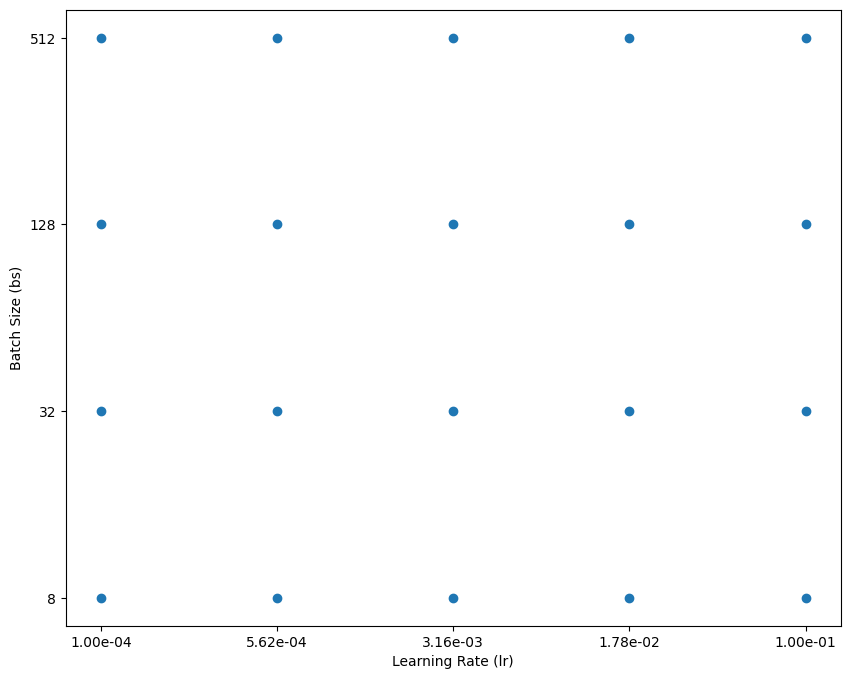

In [7]:
plt.figure(figsize=(10,8))
plt.scatter(np.log10(lr_grid), np.log2(bs_grid))
plt.yticks(np.log2(bss), labels=[i for i in bss])
plt.xticks(np.log10(lrs), labels=[f'{i:.2e}' for i in lrs])
plt.xlabel('Learning Rate (lr)')
plt.ylabel('Batch Size (bs)')
plt.show()

These values of hyperparameters can be used with tensorflow for finding best set of Hyperparameters. We will be using MNIST dataset. The trainng will be for 5 epochs for each set of hyperparameters.

### Now we train models with various combination of hyperparameters and save the best one.

In [8]:
acc_list = np.zeros(shape=len(lr_grid))
best_accuracy = 0.
best_model = None
for i in range(len(lr_grid)):
    batch_size = bs_grid[i]
    learning_rate = lr_grid[i]

    model, acc = train_model(batch_size, learning_rate, epochs=2)
    acc_list[i] = acc
    if acc > best_accuracy:
        best_accuracy = acc
        best_model = model

Training model with batch_size 8 and learning_rate 0.1


/home/jagannath/fuseAi/ai_ml_venv/lib/python3.12/site-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'classifier_1', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
2025-06-27 16:17:22.104086: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Epoch 1/2


2025-06-27 16:17:22.866701: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 159936000 exceeds 10% of free system memory.


6375/6375 ━━━━━━━━━━━━━━━━━━━━ 26s 4ms/step - accuracy: 0.1177 - loss: 2.7876
Epoch 2/2
6375/6375 ━━━━━━━━━━━━━━━━━━━━ 24s 4ms/step - accuracy: 0.1026 - loss: 2.3275
313/313 - 1s - 2ms/step - accuracy: 0.0982 - loss: 2.3334

Training model with batch_size 8 and learning_rate 0.01778279410038923


/home/jagannath/fuseAi/ai_ml_venv/lib/python3.12/site-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'classifier_2', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Epoch 1/2


2025-06-27 16:18:14.611337: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 159936000 exceeds 10% of free system memory.


6375/6375 ━━━━━━━━━━━━━━━━━━━━ 26s 4ms/step - accuracy: 0.8130 - loss: 0.7259
Epoch 2/2
6375/6375 ━━━━━━━━━━━━━━━━━━━━ 25s 4ms/step - accuracy: 0.8765 - loss: 0.5179
313/313 - 1s - 2ms/step - accuracy: 0.8812 - loss: 0.4570

Training model with batch_size 8 and learning_rate 0.0031622776601683794


/home/jagannath/fuseAi/ai_ml_venv/lib/python3.12/site-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'classifier_3', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Epoch 1/2


2025-06-27 16:19:07.402455: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 159936000 exceeds 10% of free system memory.


6375/6375 ━━━━━━━━━━━━━━━━━━━━ 26s 4ms/step - accuracy: 0.8865 - loss: 0.3691
Epoch 2/2
6375/6375 ━━━━━━━━━━━━━━━━━━━━ 28s 4ms/step - accuracy: 0.9541 - loss: 0.1585
313/313 - 1s - 3ms/step - accuracy: 0.9623 - loss: 0.1402

Training model with batch_size 8 and learning_rate 0.0005623413251903491


/home/jagannath/fuseAi/ai_ml_venv/lib/python3.12/site-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'classifier_4', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Epoch 1/2


2025-06-27 16:20:03.519651: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 159936000 exceeds 10% of free system memory.


6375/6375 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - accuracy: 0.8942 - loss: 0.3552
Epoch 2/2
6375/6375 ━━━━━━━━━━━━━━━━━━━━ 25s 4ms/step - accuracy: 0.9726 - loss: 0.0888
313/313 - 1s - 2ms/step - accuracy: 0.9714 - loss: 0.0981

Training model with batch_size 8 and learning_rate 0.0001


/home/jagannath/fuseAi/ai_ml_venv/lib/python3.12/site-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'classifier_5', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Epoch 1/2


2025-06-27 16:20:57.116764: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 159936000 exceeds 10% of free system memory.


6375/6375 ━━━━━━━━━━━━━━━━━━━━ 26s 4ms/step - accuracy: 0.8394 - loss: 0.6025
Epoch 2/2
6375/6375 ━━━━━━━━━━━━━━━━━━━━ 25s 4ms/step - accuracy: 0.9508 - loss: 0.1671
313/313 - 1s - 2ms/step - accuracy: 0.9608 - loss: 0.1287

Training model with batch_size 32 and learning_rate 0.1


/home/jagannath/fuseAi/ai_ml_venv/lib/python3.12/site-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'classifier_6', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Epoch 1/2
 515/1594 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.3237 - loss: 4.9593

KeyboardInterrupt: 

### Plotting the grid with colors representing the accuracy

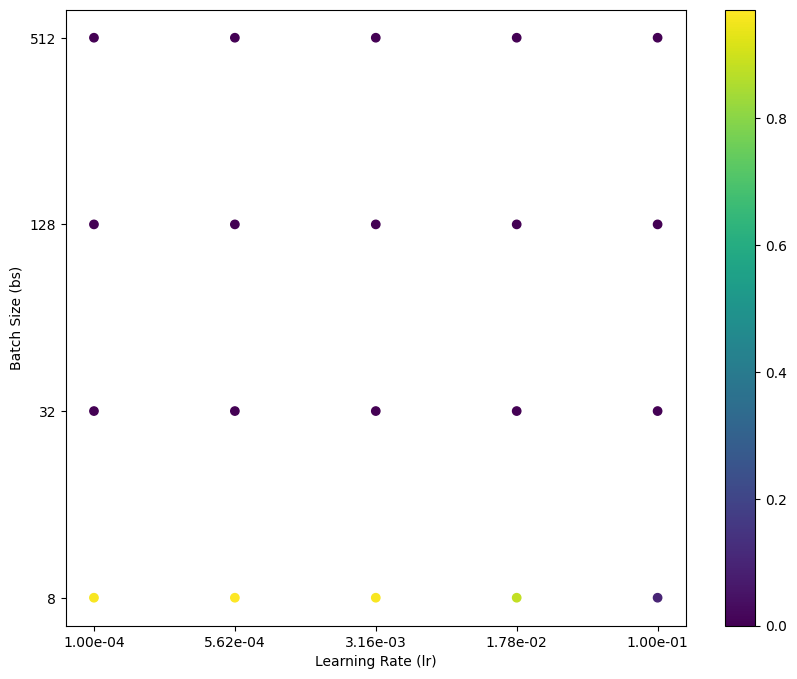

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.scatter(np.log10(lr_grid), np.log2(bs_grid), c=acc_list)
plt.yticks(np.log2(bss), labels=[i for i in bss])
plt.xticks(np.log10(lrs), labels=[f'{i:.2e}' for i in lrs])
plt.xlabel('Learning Rate (lr)')
plt.ylabel('Batch Size (bs)')
plt.colorbar()
plt.show()

In [10]:
best_accuracy

0.9714000225067139

In [11]:
best = acc_list.argmax()
print(f'Best accuracy {best_accuracy} with batch size {bs_grid[best]} learning rate {lr_grid[best]}')

Best accuracy 0.9714000225067139 with batch size 8 learning rate 0.0005623413251903491


## Random Search

We can randomly search hyperparameter values as shown below.

In [12]:
num_samples = 20
lrs = np.random.uniform(low=0.1, high=0.0001, size=num_samples)
# bss = np.random.uniform(low=8, high=512, size=num_samples)
bss = np.random.randint(low=8, high=512, size=num_samples)

We can plot the grid of 2 hyperparameters in 2D plot as below.

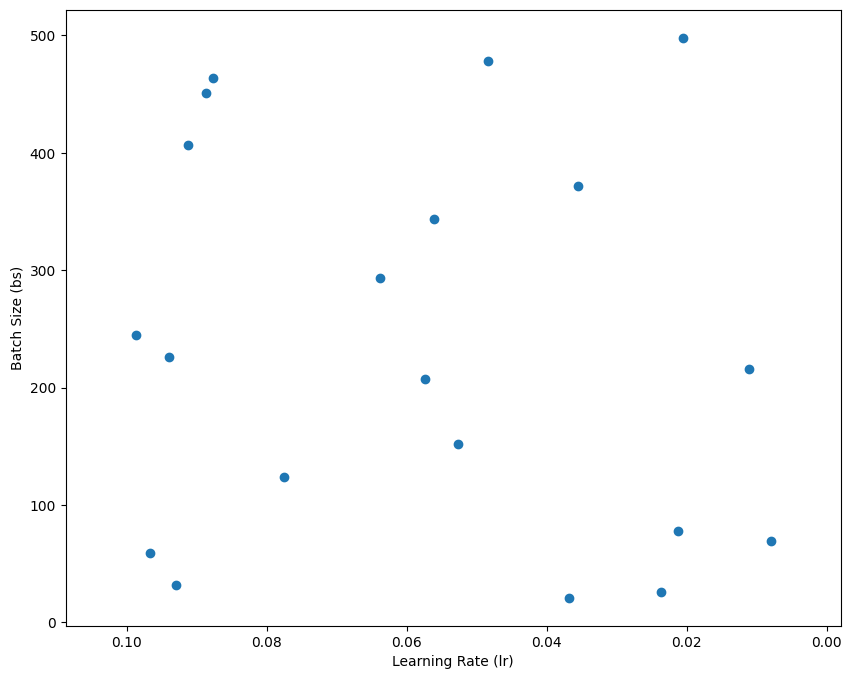

In [13]:
plt.figure(figsize=(10,8))
plt.scatter(lrs, bss)
eps = 1e-2
plt.xlim((lrs.max()+eps, lrs.min()-eps))
plt.xlabel('Learning Rate (lr)')
plt.ylabel('Batch Size (bs)')
plt.show()

These values of hyperparameters can be used with tensorflow for finding best set of Hyperparameters. We will be using MNIST dataset. The trainng will be for 5 epochs for each set of hyperparameters.

### Now we train models with various combination of hyperparameters and save the best one.

In [ ]:
acc_list = np.zeros(shape=len(lrs))
best_accuracy = 0.
best_model = None
for i in range(len(lrs)):
    batch_size = bss[i]
    learning_rate = lrs[i]

    model, acc = train_model(batch_size, learning_rate, epochs=2)
    acc_list[i] = acc
    if acc > best_accuracy:
        best_accuracy = acc
        best_model = model

Training model with batch_size 163 and learning_rate 0.09226673501889937
Train on 51000 samples
Epoch 1/2
51000/51000 [==============================] - 1s 24us/sample - loss: 2.0259 - accuracy: 0.6529
Epoch 2/2
51000/51000 [==============================] - 1s 25us/sample - loss: 0.6264 - accuracy: 0.7843
10000/10000 - 1s - loss: 0.6892 - accuracy: 0.7471

Training model with batch_size 162 and learning_rate 0.02524667457670461
Train on 51000 samples
Epoch 1/2
51000/51000 [==============================] - 1s 26us/sample - loss: 0.3650 - accuracy: 0.9007
Epoch 2/2
51000/51000 [==============================] - 1s 21us/sample - loss: 0.1868 - accuracy: 0.9485
10000/10000 - 1s - loss: 0.1686 - accuracy: 0.9522

Training model with batch_size 483 and learning_rate 0.07280405103409873
Train on 51000 samples
Epoch 1/2
51000/51000 [==============================] - 1s 13us/sample - loss: 3.0024 - accuracy: 0.5040
Epoch 2/2
51000/51000 [==============================] - 0s 8us/sample - loss:

### Plotting the grid with colors representing the accuracy

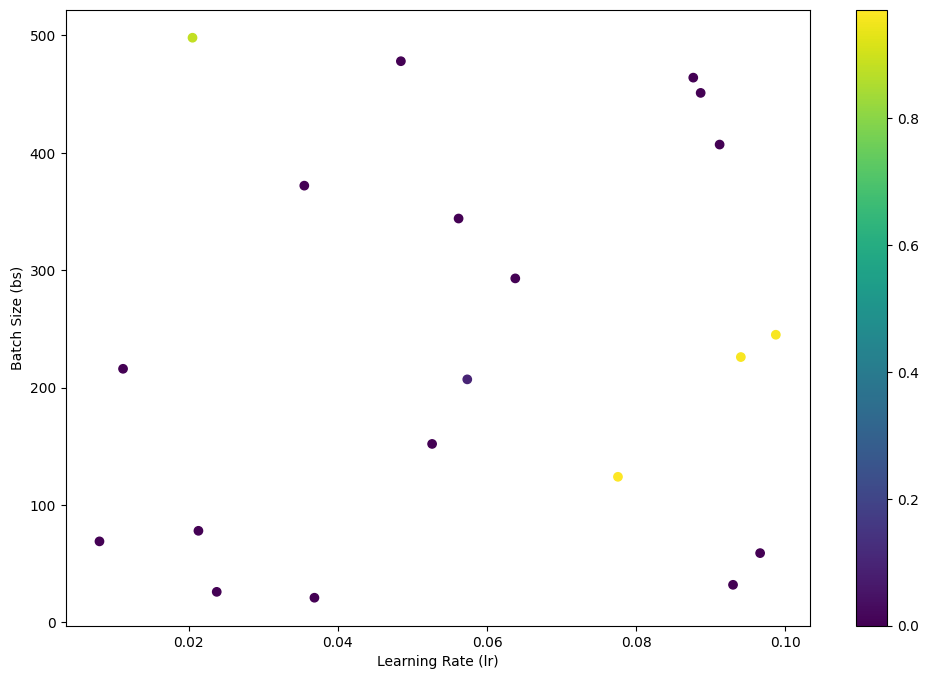

In [14]:
plt.figure(figsize=(12,8))
plt.scatter(lrs, bss, c=acc_list)
plt.xlabel('Learning Rate (lr)')
plt.ylabel('Batch Size (bs)')
plt.colorbar()
plt.show()

In [ ]:
best_accuracy

0.9698

In [ ]:
best = acc_list.argmax()
print(f'Best accuracy {best_accuracy} with batch size {bss[best]} learning rate {lrs[best]}')

## Rough -> Delete for Publish

Recall the idea of Grid Search and problem of using grid search in Deep Learning

Recall Random Search and Demonstrate an example of Random Search in ANN

Recall Genetic Grid Search and Demonstrate an example of Genetic Grid Search in ANN

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt

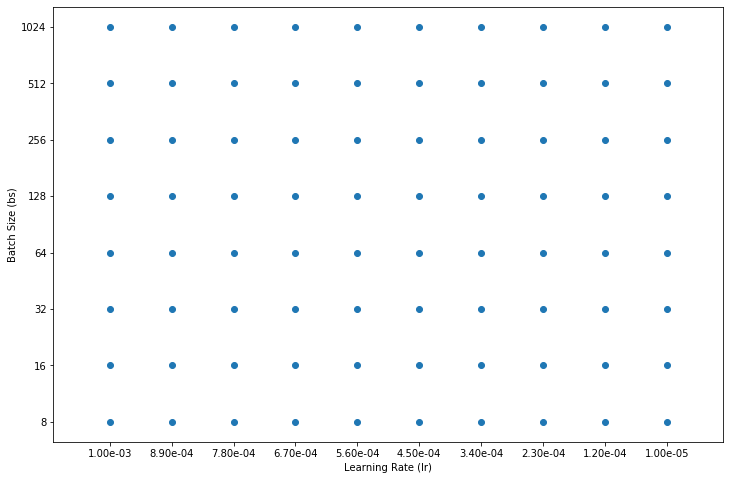

In [ ]:
# ### Grid Search
# lrs = np.linspace(0.001, 0.00001, num=10)
# bss = np.array([i for i in range(3, 11)])
# lr_grid, bs_grid = np.meshgrid(lrs, bss)

# plt.figure(figsize=(12,8))
# plt.scatter(lr_grid, bs_grid)
# eps = 1e-4
# plt.xlim((0.001+eps, 0.00001-eps))
# plt.yticks(bss, labels=[str(2**i) for i in bss])
# plt.xticks(lrs, labels=[f'{i:.2e}' for i in lrs])
# plt.xlabel('Learning Rate (lr)')
# plt.ylabel('Batch Size (bs)')

# plt.show()

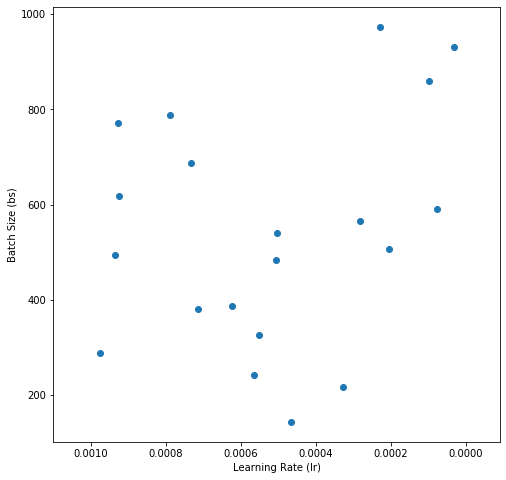

In [ ]:
# ### Random Search
# num_samples = 20
# np.random.seed(7)
# lrs = np.random.uniform(low=0.001, high=0.00001, size=num_samples)
# bss = np.random.uniform(low=8, high=1024, size=num_samples)

# plt.figure(figsize=(8,8))
# plt.scatter(lrs, bss)
# # eps = 1e-4
# plt.xlim((0.001+eps, 0.00001-eps))
# # plt.yticks(bss, labels=[str(2**i) for i in bss])
# # plt.xticks(lrs, labels=[i for i in lrs])
# plt.xlabel('Learning Rate (lr)')
# plt.ylabel('Batch Size (bs)')

# plt.show()